**CORE TASK 1:**

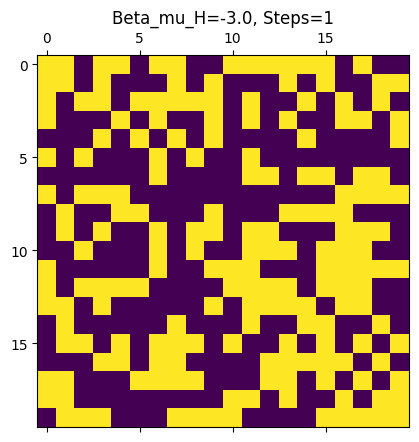

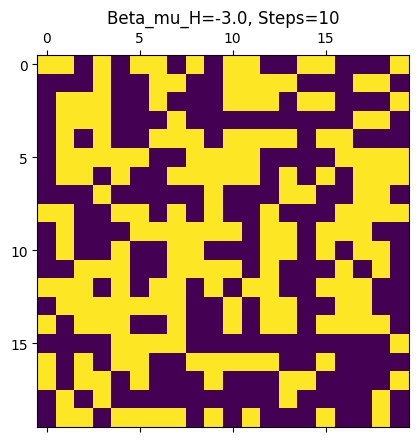

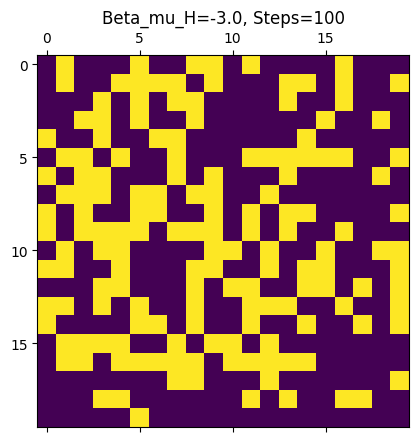

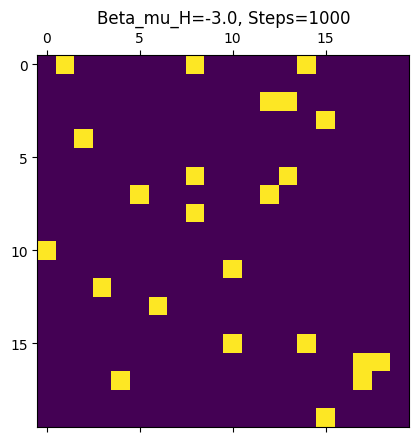

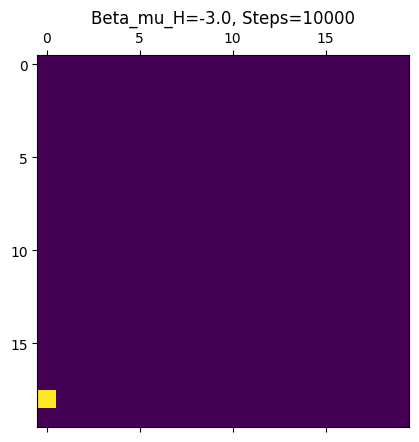

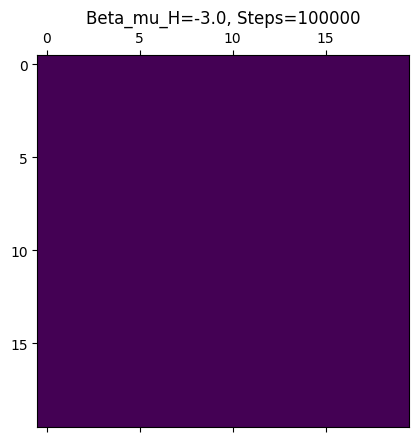

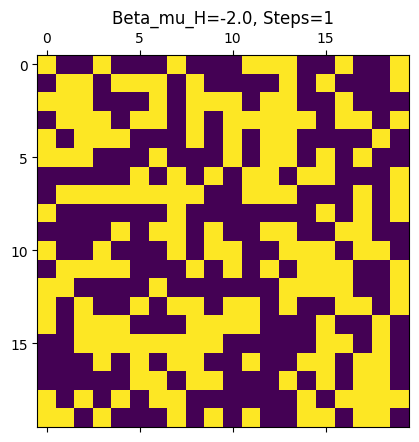

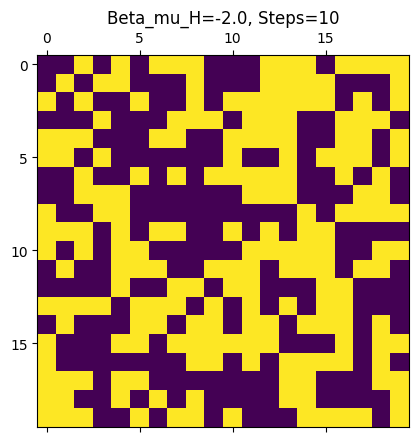

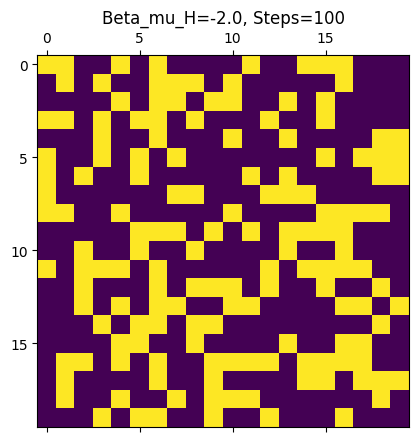

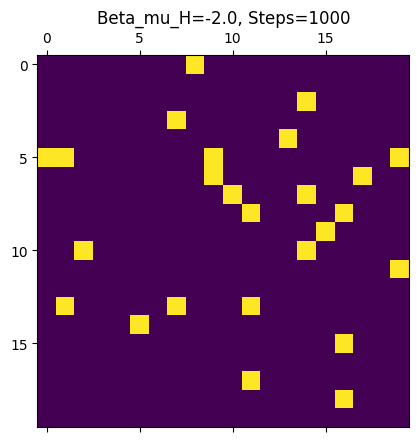

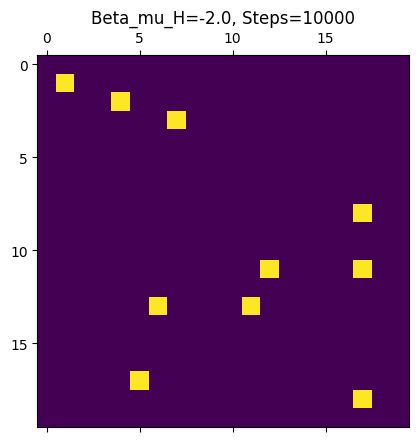

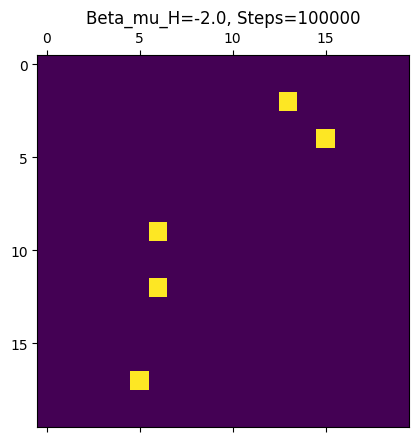

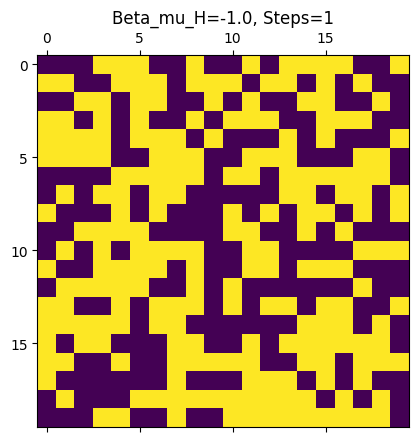

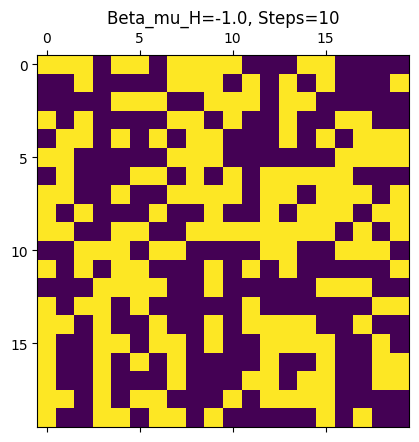

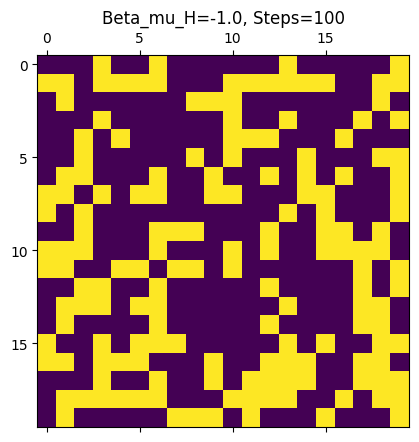

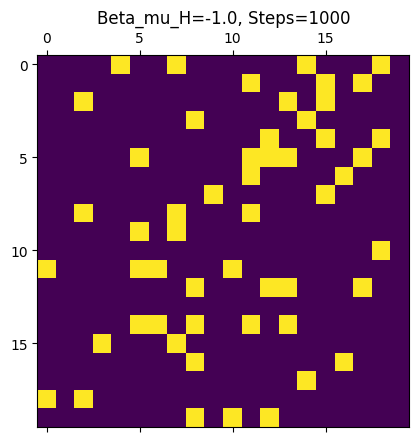

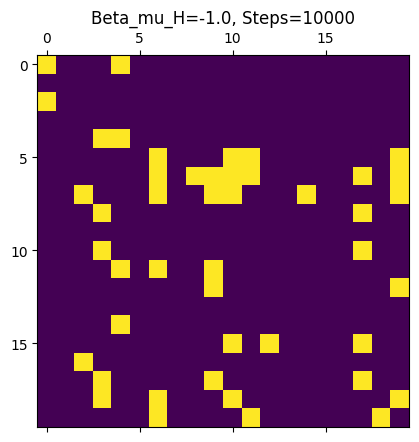

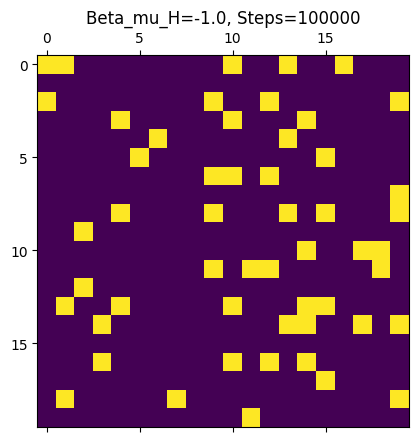

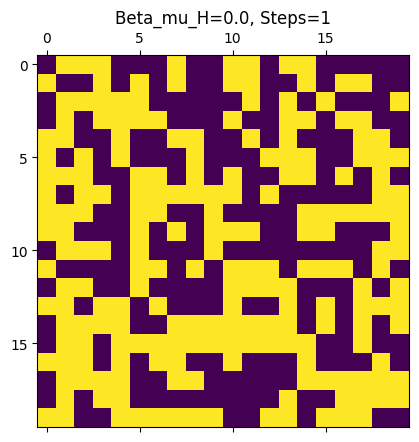

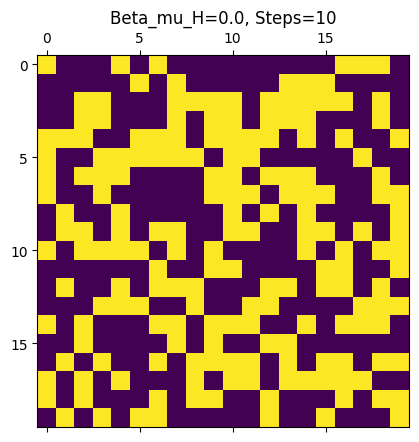

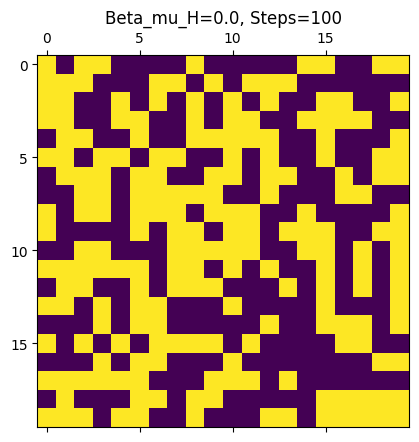

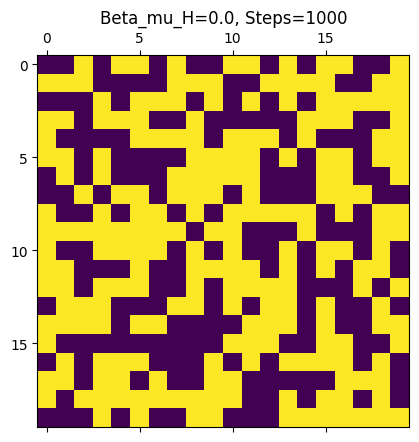

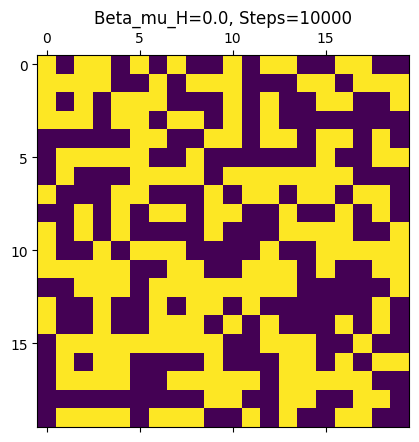

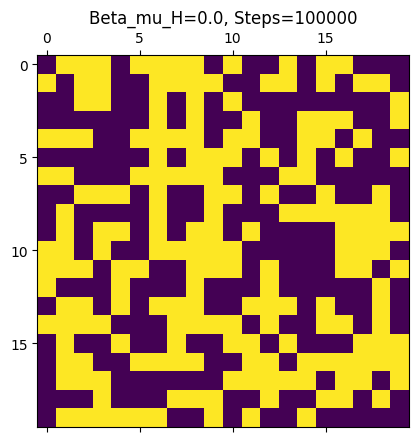

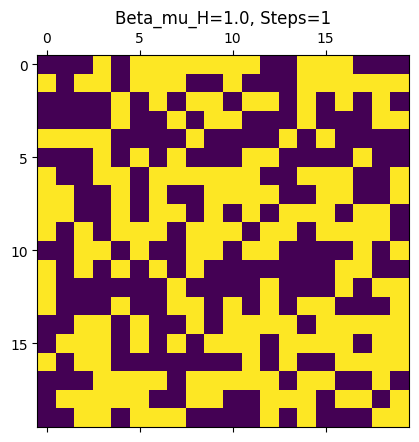

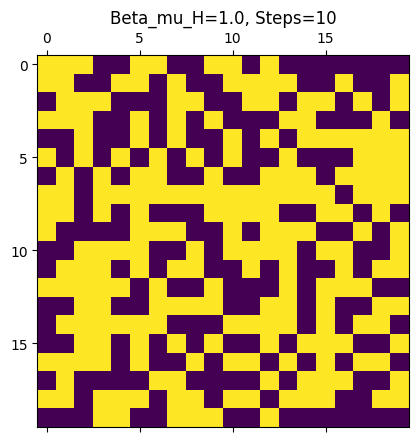

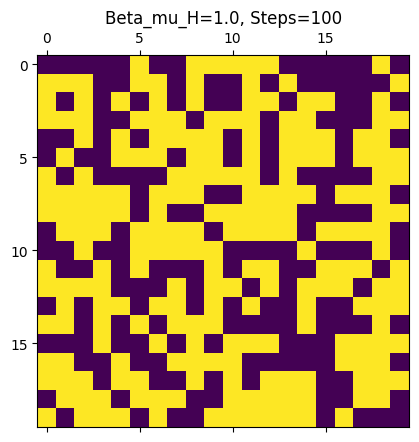

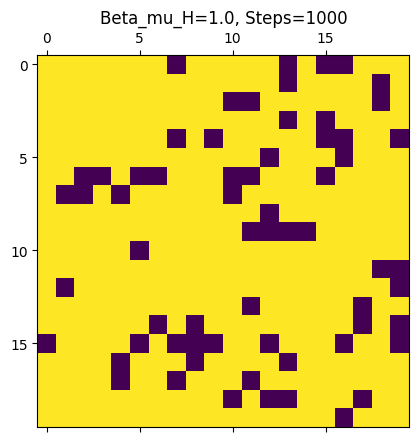

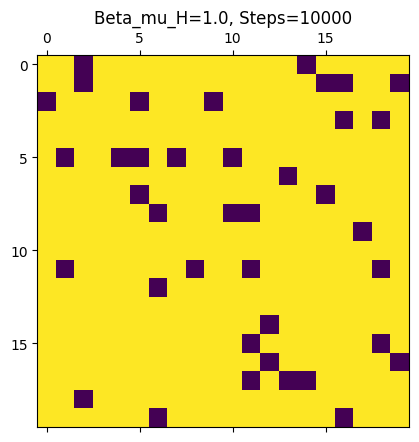

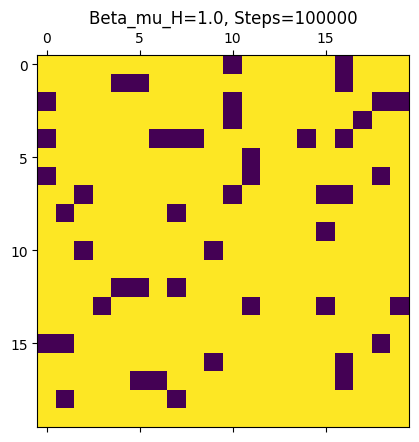

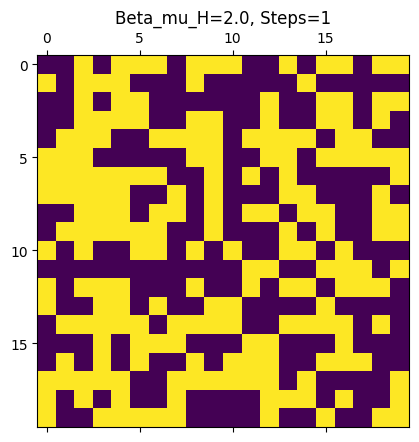

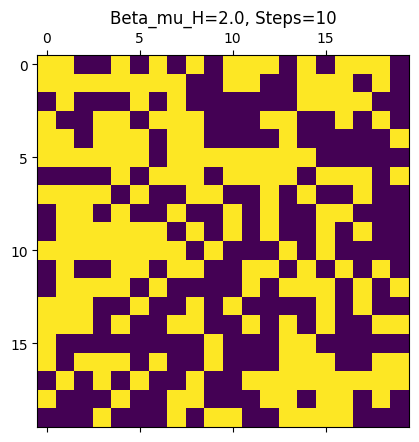

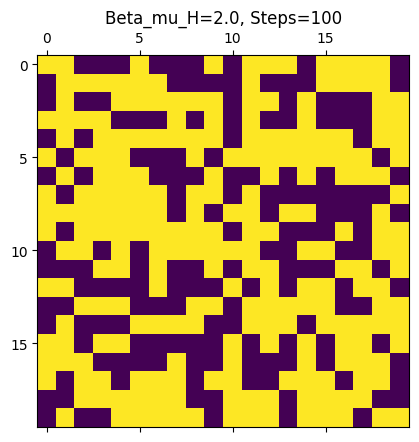

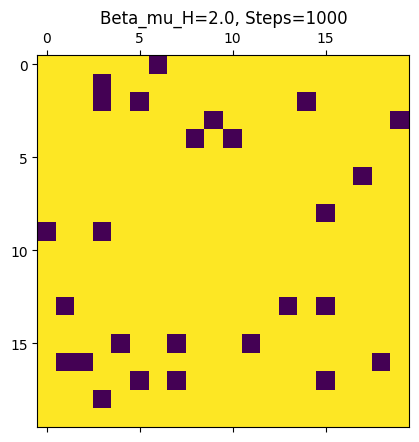

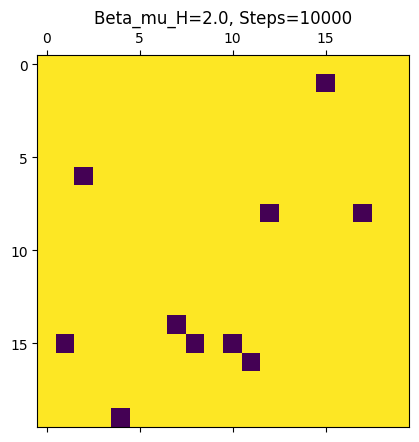

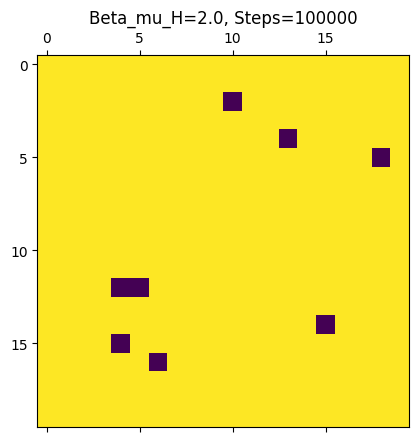

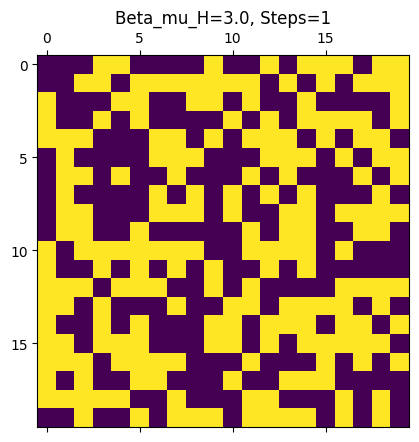

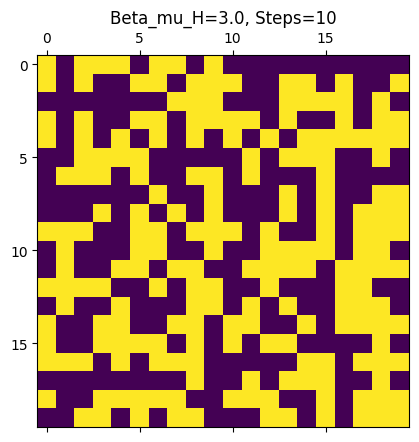

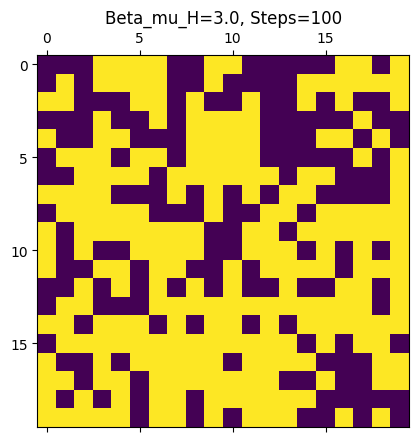

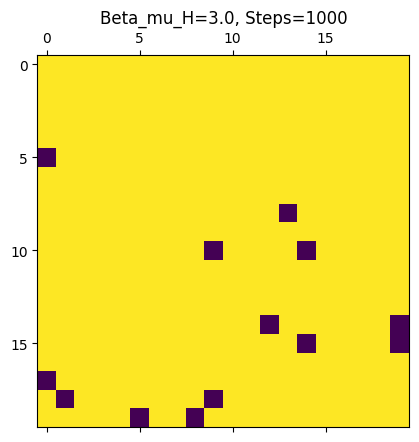

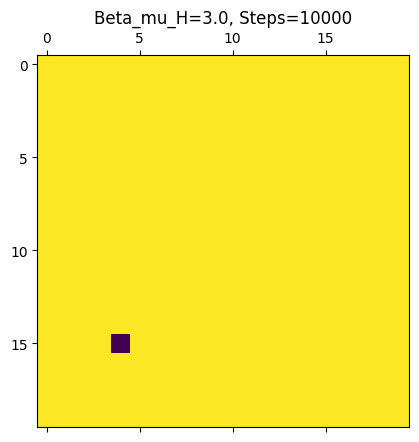

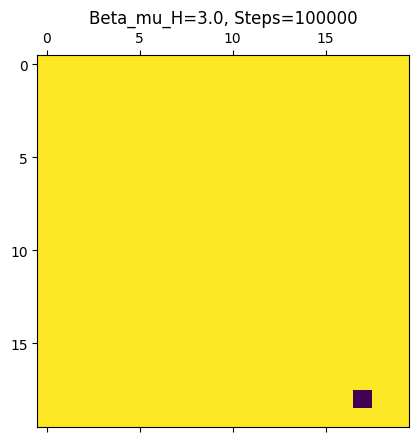

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def initialise_lattice(size, random=True):
  # initialise a square lattice with random spin orientations (+1 or -1) or all +1
    if random:
        return np.random.choice([-1, 1], size=(size, size))
    else:
        return np.ones((size, size), dtype=int)

def calculate_energy_difference(lattice, i, j, mu_H):
    # Calculate the energy change for flipping the spin at lattice site (i, j)
    # J=0
    return 2 * mu_H * lattice[i, j]

def metropolis_hastings_step(lattice, beta_mu_H, random=True):
    size = lattice.shape[0]

    # Select a random lattice site
    i, j = np.random.randint(0, size, size=2)

    # Calculate the energy change for flipping the spin at the selected site
    delta_E = calculate_energy_difference(lattice, i, j, beta_mu_H)

    # Apply Metropolis-Hastings criteria
    if delta_E < 0 or np.exp(-delta_E) > np.random.rand():
        lattice[i, j] *= -1  # Flip the spin if criteria met

def simulate_metropolis_hastings(size, beta_mu_H, num_steps, random=True):
    lattice = initialise_lattice(size, random=start)

    # Perform Monte Carlo steps
    for step in range(num_steps):
        metropolis_hastings_step(lattice, beta_mu_H)

    return lattice

# Function that plots the state of the lattice at any point
def plot_lattice_configuration(lattice, title):
    plt.matshow(lattice, cmap='viridis')
    plt.title(title)
    plt.show()

# Initial Parameters
start = True
size = 20
# Sampling Parameters
beta_mu_H_values = np.linspace(-3, 3, num=7)
num_steps_values = [1, 10, 100, 1000, 10000, 100000]

# Run simulations and plot lattice configurations
# displaying for various beta_mu_H_values and number of MC iterations
for beta_mu_H in beta_mu_H_values:
    for num_steps in num_steps_values:
        lattice = simulate_metropolis_hastings(size, beta_mu_H, num_steps, random=start)
        title = f'Beta_mu_H={beta_mu_H}, Steps={num_steps}'
        plot_lattice_configuration(lattice, title)


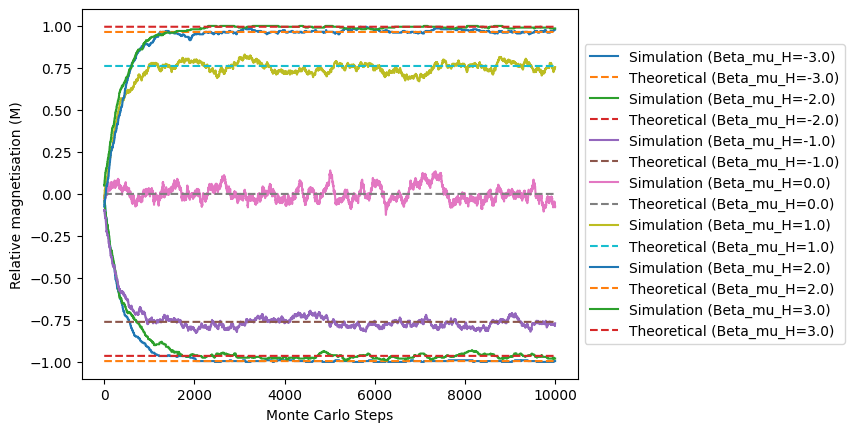

In [8]:
def theoretical_magnetisation(beta_mu_H):
    return np.tanh(beta_mu_H)

# Function that calculates the magnetisation of the lattice at any given step.
def compute_magnetisation(lattice):
    return np.sum(lattice) / lattice.size

# Perform Metropolis-Hastings step, now storing magnetisation at each step
def simulate_metropolis_hastings(size, beta_mu_H, num_steps):
    lattice = initialise_lattice(size)
    magnetisation_values = []

    for step in range(num_steps):
        metropolis_hastings_step(lattice, beta_mu_H)
        magnetisation = compute_magnetisation(lattice)
        magnetisation_values.append(magnetisation)

    return magnetisation_values

# Function that plots lattice magnetisation against MC step number
def plot_magnetisation_vs_time(size, beta_mu_H_values, num_steps):
    time_steps = np.arange(num_steps)

    for beta_mu_H in beta_mu_H_values:
        magnetisation_values = simulate_metropolis_hastings(size, beta_mu_H, num_steps)
        theoretical_magnetisation_values = theoretical_magnetisation(beta_mu_H)

        plt.plot(time_steps, magnetisation_values, label=f'Simulation (Beta_mu_H={beta_mu_H})')
        plt.plot(time_steps, [theoretical_magnetisation_values] * num_steps, label=f'Theoretical (Beta_mu_H={beta_mu_H})', linestyle='dashed')

    plt.xlabel('Monte Carlo Steps')
    plt.ylabel('Relative magnetisation (M)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Parameters
size = 20
beta_mu_H_values = np.linspace(-3, 3, num=7)
num_steps = 10000

# Plot magnetisation vs time with theoretical overlay
plot_magnetisation_vs_time(size, beta_mu_H_values, num_steps)

**CORE TASK 1: CONCLUSIONS**
- In the absence of spin coupling (𝛽𝐽 = 0), the external magnetic field and thermal motion dominate the behaviour.
- The initial state — random or uniformly aligned — doesn't significantly affect equilibration time (equilibration before 2000 steps in all cases).
- For varying strengths of the external magnetic field (−3 < 𝛽𝜇𝐻 < 3), the relative magnetisation (𝑀) aligns with the field, as shown by the saturation of magnetisation values at equilibrium, which correspond well to the analytical prediction ⟨𝑀⟩ = tanh(𝛽𝜇𝐻).
- As predicted, the stronger the external magnetic field, the quicker the spins will all align with or against the field, depending on whether 𝛽𝜇𝐻 is positive or negative.

**CORE TASK 2:**

<ipython-input-9-1dbbf5da9cd3>:67: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(beta_J_values, last_magnetisation_values, 'o', label='Simulated magnetisation', linestyle='none', marker='o')


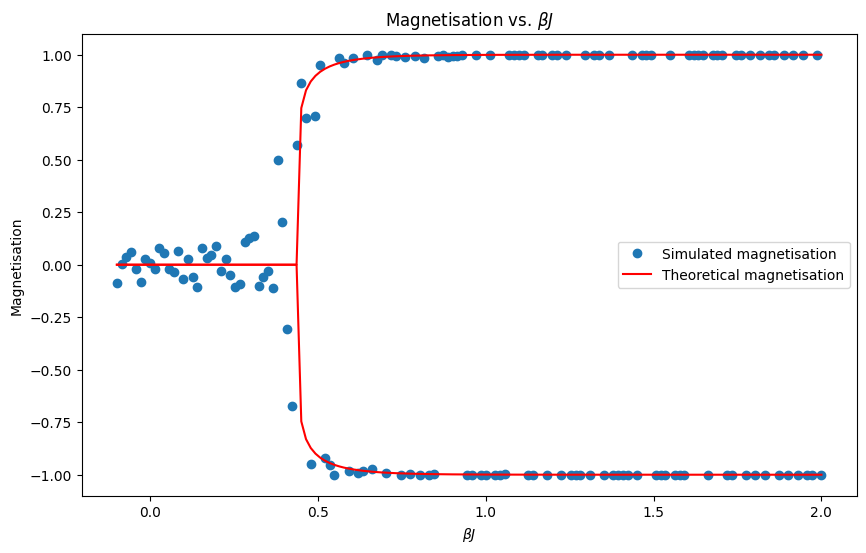

In [9]:
def calculate_energy_difference_vectorised(lattice, beta_J):
    # vectorised calculation of energy differences for flipping spins.
    # Sum of nearest neighbors using periodic boundary conditions
    neighbours_sum = (
        np.roll(lattice, 1, axis=0) + np.roll(lattice, -1, axis=0) +
        np.roll(lattice, 1, axis=1) + np.roll(lattice, -1, axis=1)
    )
    # Energy difference for flipping a spin
    return 2 * beta_J * lattice * neighbours_sum

# Vectorised Metropolis-Hastings step, using chess board method described in handout
def metropolis_hastings_vectorised(lattice, beta_J):
    size = lattice.shape[0]
    black_mask, white_mask = np.indices((size, size)).sum(axis=0) % 2 == 0, np.indices((size, size)).sum(axis=0) % 2 == 1

    for step in range(num_steps):
        # Choose the mask for this step
        mask = black_mask if step % 2 == 0 else white_mask

        # Calculate energy difference for the applicable squares
        delta_E = calculate_energy_difference_vectorised(lattice, beta_J)

        # Vectorised Metropolis-Hastings criterion
        flip_condition = (delta_E < 0) | (np.exp(-delta_E) > np.random.random(size=(size, size)))

        # Apply the mask to ensure only the correct squares are considered
        lattice[flip_condition & mask] *= -1
    return lattice

# Onsanger analytical solution
def theoretical_magnetisation(beta_J):
    critical_temperature = 2 * beta_J / (np.log(1 + 2**(1/2)))
    if 1 >= critical_temperature:
        return [0,0]
    else:
        positive = (1-np.sinh(2*beta_J)**(-4))**(1/8)
        negative = - positive
        return [positive, negative]

# Perform Metropolis-Hastings step, vectorised also now
def simulate_metropolis_hastings_vectorised(size, beta_J, num_steps):
    lattice = initialise_lattice(size)
    magnetisation_values = []

    for step in range(num_steps):
        metropolis_hastings_vectorised(lattice, beta_J)
        magnetisation = compute_magnetisation(lattice)
        magnetisation_values.append(magnetisation)

    return magnetisation_values

# It is easier to work in terms of beta_J, as the Onsanger critical beta_J is
# constant and dimensionless.

def plot_last_magnetisation_vs_beta_J(size, beta_J_values, num_steps):
    last_magnetisation_values = []
    theoretical_values_positive = []
    theoretical_values_negative = []

    for beta_J in beta_J_values:
        magnetisation_values = simulate_metropolis_hastings_vectorised(size, beta_J, num_steps)
        last_magnetisation_values.append(magnetisation_values[-1])
        theoretical_values_positive.append(np.array(theoretical_magnetisation(beta_J)[0]))
        theoretical_values_negative.append(np.array(theoretical_magnetisation(beta_J)[1]))

    plt.figure(figsize=(10, 6))
    plt.plot(beta_J_values, last_magnetisation_values, 'o', label='Simulated magnetisation', linestyle='none', marker='o')
    plt.plot(beta_J_values, theoretical_values_positive, color='red', label='Theoretical magnetisation', linestyle='-', marker=None)
    plt.plot(beta_J_values, theoretical_values_negative, color='red', linestyle='-', marker=None)
    plt.xlabel('$\\beta J$')
    plt.ylabel('Magnetisation')
    plt.legend()
    plt.title('Magnetisation vs. $\\beta J$')
    plt.savefig("Core_Task_2.png")
    plt.show()

size = 20
beta_J_values = np.linspace(-0.1, 2, num=150)
num_steps = 250
start = True

plot_last_magnetisation_vs_beta_J(size, beta_J_values, num_steps)

**CORE TASK 2: CONCLUSIONS**

*Ferromagnetic Coupling (𝛽𝐽 = 0.2)*: With ferromagnetic coupling, spins tend to align with their neighbors due to the positive interaction energy. Starting from either a random or uniform initial state, the system will evolve towards a state where many of the spins are aligned, leading to a positive overall magnetisation. As the temperature decreases below the critical temperature (𝑇𝑐), long-range order emerges, and the system undergoes a phase transition to a state with spontaneous magnetisation.

*Antiferromagnetic Coupling (𝛽𝐽 = −0.2)*: Antiferromagnetic coupling encourages neighboring spins to orient in opposite directions, minimizing the energy by having as many antialigned neighbors as possible. The overall magnetisation in such a state will be close to zero due to the equal presence of up and down spins, especially visible when starting from a random configuration.


*Phase Transition Behaviour:*

- We get close agreement with the Onsanger solution, especially in the region below 𝑇𝑐, where saturation magnetisation is acheived.
- There is more error in the region around and below 𝑇𝑐, as is to be expected (exact equilibriation is harder to acheive here are thermal fluctutations are more dominant).
- We expect large fluctuations in magnetisation due to the system being close to the phase transition.
- Critical slowing down, where the system takes longer to equilibrate as it approaches 𝑇𝑐.
- Possible lack of clear long-range order at 𝑇𝑐 due to the finite size of the simulated lattice, as opposed to the theoretical infinite lattice.
- Run for longer, and a larger lattice to potentially increase clarity near transition.

**SUPPLEMENTARY TASK:**

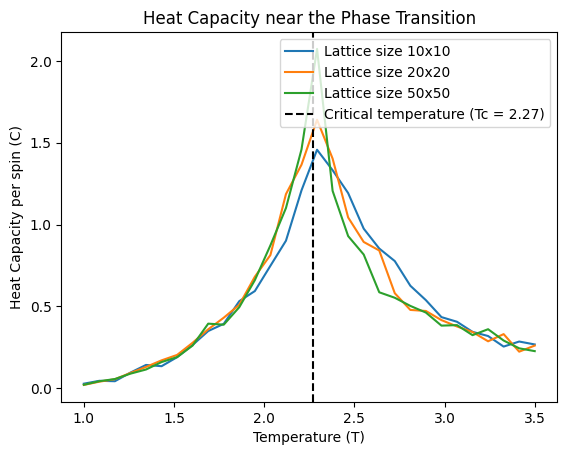

In [10]:
def calculate_internal_energy_vectorised(lattice, beta_J):
    # Sum of nearest neighbors using periodic boundary conditions
    neighbours_sum = (
        np.roll(lattice, 1, axis=0) + np.roll(lattice, -1, axis=0) +
        np.roll(lattice, 1, axis=1) + np.roll(lattice, -1, axis=1)
    )
    total_energy_vectorised = - J * lattice * neighbours_sum
    total_energy = np.sum(total_energy_vectorised)
    return total_energy / 2  # Divide by 2 to avoid double counting

# Use fluctuation-dissipation theorem to calculate heat capacity
def calculate_heat_capacity(energies, kB, T):
    sigma_E = np.std(energies)
    heat_capacity = sigma_E**2 / (kB * T**2)
    return heat_capacity

def simulate_heat_capacity(size, T_values, num_steps, kB, J):
    heat_capacity_values = []

    for T in T_values:
        beta = 1 / (kB * T)
        lattice = initialise_lattice(size, True)
        energies = []

        # Allow the system to equilibrate before measurement
        for step in range(num_steps):
            lattice = metropolis_hastings_vectorised(lattice, beta * J)
            if step >= equilibration_steps:
                energy = calculate_internal_energy_vectorised(lattice, beta * J)
                energies.append(energy)

        # Calculate and store the heat capacity
        heat_capacity = calculate_heat_capacity(np.array(energies), kB, T)
        heat_capacity_values.append(heat_capacity / (size**2))  # per spin normalization

    return heat_capacity_values

# Parameters
T_values = np.linspace(1, 3.5, 30)
num_steps = 500
kB = 1 # taken to be 1 for clarity
J=1 # taken to be 1 for clarity
equilibration_steps = int(num_steps * 0.2)
Tc = 2/ (np.log(1+np.sqrt(2))) # Critical temperature

for size in [10, 20, 50]:
    heat_capacity_values = simulate_heat_capacity(size, T_values, num_steps, kB, J)
    plt.plot(T_values, heat_capacity_values, label=f'Lattice size {size}x{size}')

plt.axvline(Tc, color='k', linestyle='--', label=f'Critical temperature (Tc = {Tc:.2f})')
plt.xlabel('Temperature (T)')
plt.ylabel('Heat Capacity per spin (C)')
plt.legend()
plt.title('Heat Capacity near the Phase Transition')
plt.savefig("Supplementary Task 1")
plt.show()

**SUPPLEMENTARY TASK: CONCLUSIONS**

The results shows the heat capacity per spin (C) as a function of temperature (T) for different lattice sizes (10x10, 20x20, and 50x50), with no external magnetic field present (𝐻 = 0).

*Heat Capacity and Critical Temperature:*
- The heat capacity, C, exhibits a sharp peak near the critical temperature (𝑇𝑐 ≈ 2.27).
- For the Ising model on a two-dimensional square lattice with nearest-neighbor interactions, this is a second-order phase transition characterized by a divergence of the heat capacity in the thermodynamic limit (infinite lattice size).

*Lattice Size Effect:*
- As the lattice size increases, the peak in heat capacity becomes sharper and more pronounced, moving closer to the theoretical critical temperature.
- As expected due to the reduced finite-size effects in larger lattices.
- The peak height in heat capacity for finite lattices is related to the correlation length of spin-spin correlations, which diverges at the critical point for an infinite lattice.

*Critical Fluctuations:*
- The broadening of the heat capacity peak for smaller lattices indicates larger fluctuations in energy as the system size decreases.
- Close to the critical temperature, these fluctuations become more significant, and the system's behavior becomes more susceptible to thermal noise, leading to the rounded peak observed in smaller lattices.

